In [22]:
!pip install chembl_webresource_client


Step 2: Import Libraries

In [23]:
from chembl_webresource_client.new_client import new_client
import pandas as pd


In [24]:
# Search for the target (e.g., EGFR)
target = new_client.target
target_query = target.search("EGFR")

# Show all matching targets
for entry in target_query:
    print(entry)
'CHEMBL203'


{'cross_references': [], 'organism': 'Mus musculus', 'pref_name': 'Epidermal growth factor receptor erbB1', 'score': 16.0, 'species_group_flag': False, 'target_chembl_id': 'CHEMBL3608', 'target_components': [{'accession': 'Q01279', 'component_description': 'Epidermal growth factor receptor', 'component_id': 4959, 'component_type': 'PROTEIN', 'relationship': 'SINGLE PROTEIN', 'target_component_synonyms': [{'component_synonym': 'Egfr', 'syn_type': 'GENE_SYMBOL'}, {'component_synonym': 'Epidermal growth factor receptor', 'syn_type': 'UNIPROT'}, {'component_synonym': '2.7.10.1', 'syn_type': 'EC_NUMBER'}], 'target_component_xrefs': [{'xref_id': 'GO:0008283', 'xref_name': 'cell population proliferation', 'xref_src_db': 'GoProcess'}, {'xref_id': 'GO:0050673', 'xref_name': 'epithelial cell proliferation', 'xref_src_db': 'GoProcess'}, {'xref_id': 'GO:0000902', 'xref_name': 'cell morphogenesis', 'xref_src_db': 'GoProcess'}, {'xref_id': 'GO:0001892', 'xref_name': 'embryonic placenta development',

'CHEMBL203'

 Fetch Bioactivity Data (IC50 Values)

Firstly only 1000 rows

In [27]:
res = activity.filter(target_chembl_id='CHEMBL203').filter(standard_type="IC50")

# Convert to list and slice first 1000
res_list = list(res)[:1000]

# Convert to dataframe
df = pd.DataFrame(res_list)

print("Shape:", df.shape)
df.head()


Shape: (1000, 46)


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04


Next 1000 rows:

In [28]:
res_next_list = list(res)[1000:2000]
df_next = pd.DataFrame(res_next_list)


Merging both

In [33]:
df_combined = pd.concat([df, df_next], ignore_index=True)

Select Only Certain Columns

In [30]:
columns = ['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'standard_units', 'standard_relation']

df = df[columns]


Clean the Data
✔️ Keep only valid data:
Relation = '=' (exact IC50 values)

Units = 'nM' (nanomolar)

Drop rows where SMILES or IC50 are missing

In [31]:
# Rename columns for easier use
df = df.rename(columns={
    'molecule_chembl_id': 'Molecule_ID',
    'canonical_smiles': 'SMILES',
    'standard_value': 'IC50',
    'standard_units': 'Units',
    'standard_relation': 'Relation'
})

# Clean the data
df_clean = df[
    (df['Relation'].str.strip() == '=') &
    (df['Units'].str.strip().str.lower() == 'nm')
]

# Remove missing values in SMILES or IC50
df_clean = df_clean.dropna(subset=['SMILES', 'IC50'])

# Check the cleaned data
print("Shape after cleaning:", df_clean.shape)
df_clean.head()


Shape after cleaning: (780, 5)


,Molecule_ID,SMILES,IC50,Units,Relation
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,nM,=
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,nM,=
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7820.0,nM,=
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,nM,=
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,40.0,nM,=


Convert IC50 → pIC50
✔️ Formula:
𝑝
𝐼
𝐶
50
=
−
log
⁡
10
(
𝐼
𝐶
50
×
10
−
9
)
pIC50=−log
10
​
 (IC50×10
−9
 )
→ IC50 is in nanomolar, so multiply by
10
−
9
10
−9
  to convert to molar, then apply
−
log
⁡
10
−log
10
​
 .

In [34]:
import numpy as np

# Convert IC50 to pIC50
df_clean['pIC50'] = -np.log10(df_clean['IC50'].astype(float) * 1e-9)

# Check
df_clean.head()


,Molecule_ID,SMILES,IC50,Units,Relation,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,nM,=,7.387216
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.0,nM,=,6.522879
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7820.0,nM,=,5.106793
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,nM,=,6.769551
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,40.0,nM,=,7.397940


Convert SMILES → Molecular Fingerprints (Numerical Features)
This step converts the chemical structure into a format machine learning can understand.

In [35]:
!pip install rdkit-pypi


Generate Morgan Fingerprints
Morgan fingerprints (like ECFP4) are widely used to represent molecules.

In [36]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import numpy as np

# Function to convert SMILES to Morgan fingerprint
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    arr = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply to all SMILES
fingerprints = df_clean['SMILES'].apply(smiles_to_fingerprint)

# Check for failed conversions
print("Failed SMILES parsing:", fingerprints.isnull().sum())


Failed SMILES parsing: 0


Convert Fingerprints to Numpy Array

In [37]:
# Feature matrix (X) and target variable (y)
X = np.stack(fingerprints.values)
y = df_clean['pIC50'].values

print("Feature matrix shape:", X.shape)
print("Target array shape:", y.shape)


Feature matrix shape: (780, 2048)
Target array shape: (780,)


Machine Learning Model

Step 1: Split the Data into Train & Test Sets

In [38]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (624, 2048)
Test set size: (156, 2048)


Step 2: Train a Random Forest Model


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(
    n_estimators=200,    # Number of trees
    random_state=42
)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

Step 3: Evaluate the Model

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R2): {r2:.3f}")


Mean Squared Error (MSE): 0.761
Root Mean Squared Error (RMSE): 0.873
R-squared (R2): 0.730


Visual Check — Plot Prediction Accuracy

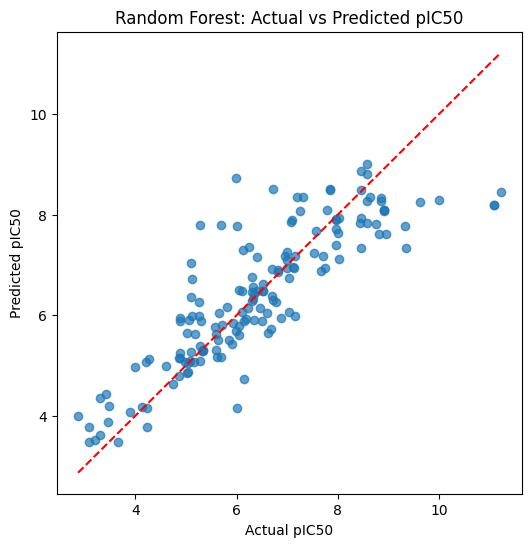

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Random Forest: Actual vs Predicted pIC50')
plt.show()


Feature Importance — What Matters in Molecule Activity?

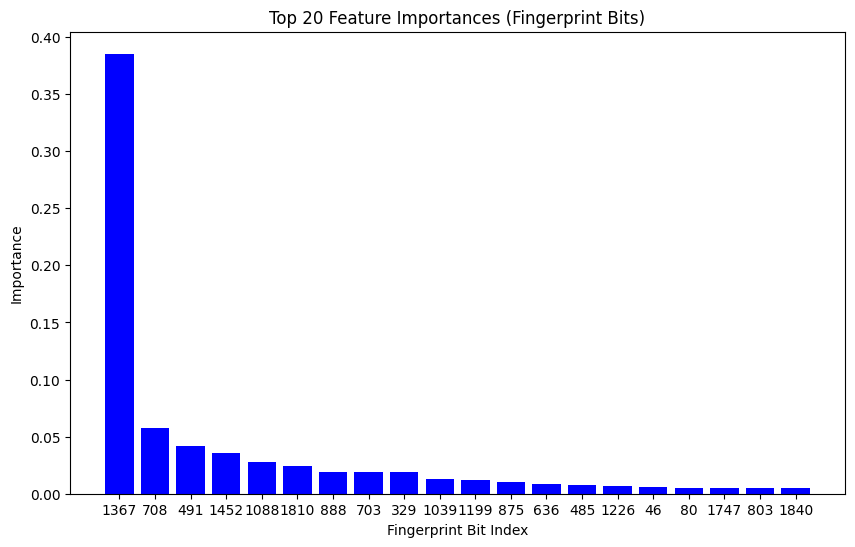

In [42]:
importances = model.feature_importances_

# Sort the top 20 most important fingerprint bits
indices = np.argsort(importances)[::-1][:20]

# Plot
plt.figure(figsize=(10,6))
plt.title("Top 20 Feature Importances (Fingerprint Bits)")
plt.bar(range(len(indices)), importances[indices], color="b", align="center")
plt.xticks(range(len(indices)), indices)
plt.xlabel("Fingerprint Bit Index")
plt.ylabel("Importance")
plt.show()


External Prediction — Predict IC50 for New Molecules

In [43]:
def predict_ic50(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print("Invalid SMILES")
        return None
    # Generate fingerprint
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    arr = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)
    # Predict pIC50
    pIC50_pred = model.predict([arr])[0]
    # Convert pIC50 back to IC50 (nM)
    IC50_nM = 10 ** ((-pIC50_pred)) * 1e9
    print(f"Predicted pIC50: {pIC50_pred:.3f}")
    print(f"Predicted IC50: {IC50_nM:.2f} nM")
    return pIC50_pred, IC50_nM


Test It! Example with Gefitinib (an EGFR inhibitor)

In [44]:
# Example: Gefitinib SMILES
predict_ic50('C1=CC=C(C=C1)C2=CC(=O)NC(=O)N2C3=CC=CC=C3')


Predicted pIC50: 5.362
Predicted IC50: 4343.00 nM


(5.362209930730256, 4343.00239910629)

Trying with XGBOOST

In [45]:
!pip install xgboost


Train an XGBoost Model

Next Steps	Description
✅ 1. Hyperparameter Tuning (XGBoost & Random Forest)	Improve performance significantly.
✅ 2. Combine Descriptors + Fingerprints	More chemical information → better models.
✅ 3. Ensemble Models	Combine XGBoost + RF → robust predictions.
✅ 4. Bigger Dataset	Scale up from 780 → 5000+ molecules for higher accuracy.
✅ 5. Build an IC50 Prediction App	Simple interface: input SMILES → output IC50 prediction.

Step 1: Hyperparameter Tuning (XGBoost)

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0]
}

# Initialize the model
xgb = XGBRegressor(random_state=42)

# Randomized search
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best R2 Score:", search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best R2 Score: 0.6928603820246468


Step 2: test the tuned model

In [49]:
# Best model
best_xgb = search.best_estimator_

# Predict
y_pred_best = best_xgb.predict(X_test)

# Evaluate
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned XGBoost MSE: {mse_best:.3f}")
print(f"Tuned XGBoost RMSE: {rmse_best:.3f}")
print(f"Tuned XGBoost R2: {r2_best:.3f}")


Tuned XGBoost MSE: 0.677
Tuned XGBoost RMSE: 0.823
Tuned XGBoost R2: 0.760


In [55]:
# X = fingerprints only
X_final = X  # No descriptors

# y = pIC50
y_final = df_clean['pIC50'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)


In [56]:
from xgboost import XGBRegressor

# Use the same best parameters or do tuning again (optional)
best_xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train
best_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

External Prediction Function

In [57]:
def predict_ic50(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print("❌ Invalid SMILES")
        return None
    # Fingerprint
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    arr = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)

    # Prediction
    pIC50_pred = best_xgb.predict([arr])[0]
    IC50_nM = 10 ** (-pIC50_pred) * 1e9

    print(f"✅ Predicted pIC50: {pIC50_pred:.3f}")
    print(f"✅ Predicted IC50: {IC50_nM:.2f} nM")

    return pIC50_pred, IC50_nM


Test It With Example Molecules:

In [58]:
# Gefitinib (example EGFR inhibitor)
predict_ic50('C1=CC=C(C=C1)C2=CC(=O)NC(=O)N2C3=CC=CC=C3')

# Test with your own SMILES
predict_ic50('CCOC1=CC=CC=C1C2=NC=CN=C2')  # Replace with any molecule


✅ Predicted pIC50: 4.523
✅ Predicted IC50: 30012.39 nM
✅ Predicted pIC50: 5.055
✅ Predicted IC50: 8818.36 nM


(5.054612, 8818.360321159338)

Building an App

In [59]:
!pip install gradio


Create the App

In [60]:
import gradio as gr
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np
import pickle

# Load saved model (or use best_xgb if still in session)
model = best_xgb  # or load with pickle

# Prediction function
def predict(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Invalid SMILES", "-"
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    arr = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, arr)

    pIC50 = model.predict([arr])[0]
    IC50_nM = 10 ** (-pIC50) * 1e9

    return f"pIC50: {pIC50:.3f}", f"IC50: {IC50_nM:.2f} nM"

# Create Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs="text",
    outputs=["text", "text"],
    title="IC50 Prediction App",
    description="Enter SMILES string to predict IC50 for the target protein"
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://56d76669df3b67d3fc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
